In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st

t_true = np.arange(0,273,0.1)
t_data = np.loadtxt('timedata.dat')
x_data = np.loadtxt('data.dat')

re_data = np.loadtxt('re_estimates_on.dat')
re_time = np.arange(0,365)

import parse

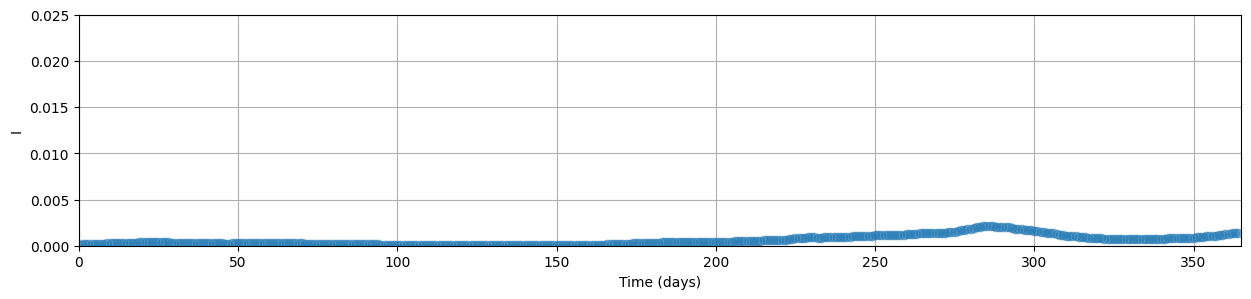

In [2]:
f, ax = plt.subplots(1, figsize=(15,3))
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.plot(t_data,x_data,'o',alpha=0.5,c='tab:blue')
# plt.plot(t_data_old,x_data_old,'o',alpha=0.5,c='tab:red')
plt.grid(True)
plt.xlim([0,365])
plt.ylim([0,0.025])
plt.xlabel('Time (days)', fontsize=10)
plt.ylabel('I', fontsize=10)
plt.savefig('figures/data.pdf')
# plt.close()

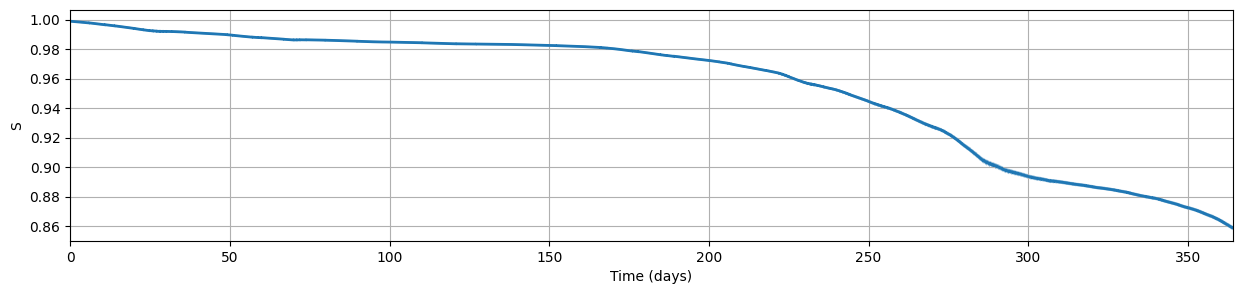

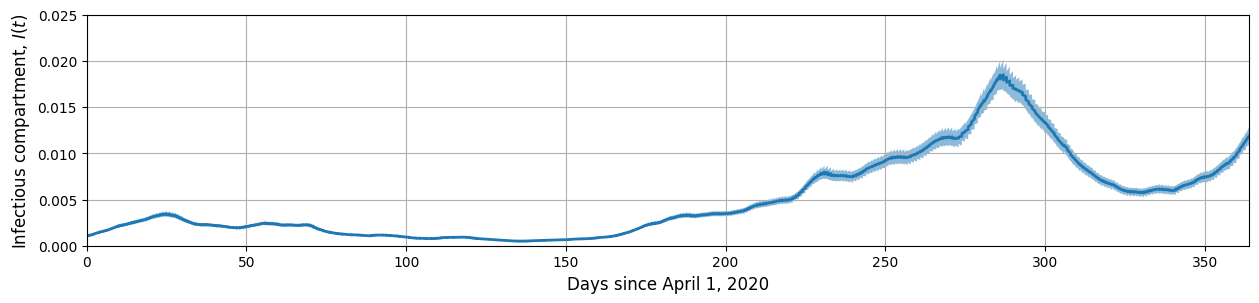

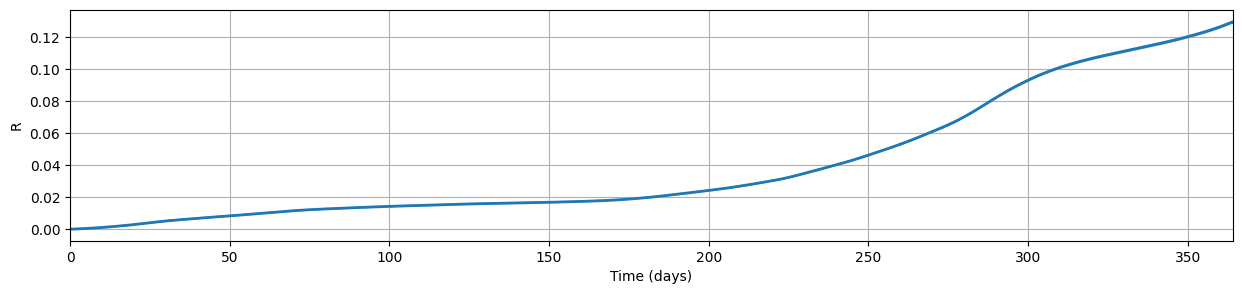

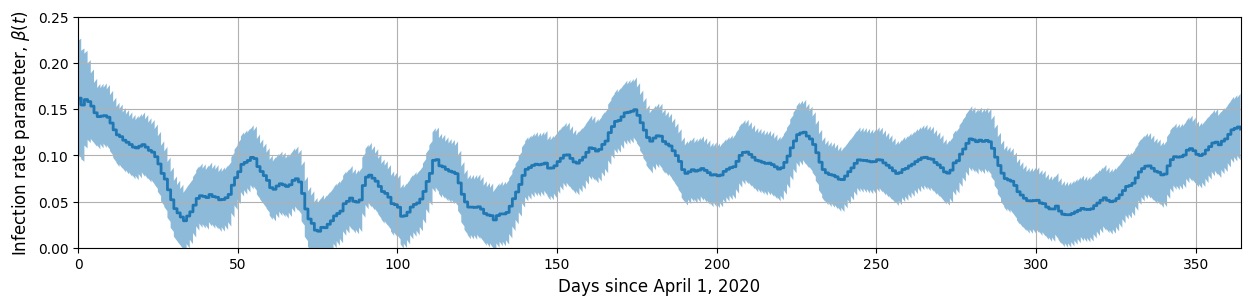

In [3]:
## Model 4

[t,x_mean,x_var] =  parse.parseXML('Model4SS-state-estimation0.xml')

f, ax = plt.subplots(1, figsize=(15,3))
plt.plot(t,x_mean[0,:],linewidth=2,c='tab:blue')
plt.fill_between(t,x_mean[0,:]+1.96*np.sqrt(x_var[0,:]),x_mean[0,:]-1.96*np.sqrt(x_var[0,:]),facecolor='tab:blue',alpha=0.5)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
# plt.plot(t_data,x_data,'o',alpha=0.5,c='tab:red')
plt.grid(True)
plt.xlim([0,364])
# plt.ylim([-15,15])
plt.xlabel('Time (days)', fontsize=10)
plt.ylabel('S', fontsize=10)
plt.savefig('figures/m4_s.pdf')
# plt.close()

f, ax = plt.subplots(1, figsize=(15,3))
plt.plot(t,x_mean[1,:],linewidth=2,c='tab:blue')
plt.fill_between(t,x_mean[1,:]+1.96*np.sqrt(x_var[5,:]),x_mean[1,:]-1.96*np.sqrt(x_var[5,:]),facecolor='tab:blue',alpha=0.5)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
# plt.plot(t_data,4*x_data,'o',alpha=0.2,c='tab:red')
plt.grid(True)
plt.xlim([0,364])
plt.ylim([0,0.025])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Infectious compartment, $I(t)$', fontsize=12)
plt.savefig('figures/m4_i.pdf')
# plt.close()

f, ax = plt.subplots(1, figsize=(15,3))
plt.plot(t,x_mean[2,:],linewidth=2,c='tab:blue')
plt.fill_between(t,x_mean[2,:]+1.96*np.sqrt(x_var[10,:]),x_mean[2,:]-1.96*np.sqrt(x_var[10,:]),facecolor='tab:blue',alpha=0.5)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xlim([0,364])
# plt.ylim([-15,15])
plt.xlabel('Time (days)', fontsize=10)
plt.ylabel('R', fontsize=10)
plt.savefig('figures/m4_r.pdf')
# plt.close()

f, ax = plt.subplots(1, figsize=(15,3))
plt.plot(t,x_mean[3,:],linewidth=2,c='tab:blue')
plt.fill_between(t,x_mean[3,:]+1.96*np.sqrt(x_var[15,:]),x_mean[3,:]-1.96*np.sqrt(x_var[15,:]),facecolor='tab:blue',alpha=0.5)
# plt.plot([10,10],[-100,100],'sk:',linewidth=1.5)
plt.grid(True)
plt.xlim([0,364])
plt.ylim([0,0.25])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Infection rate parameter, $\beta(t)$', fontsize=12)
plt.savefig('figures/m4_b.pdf')
# plt.close()


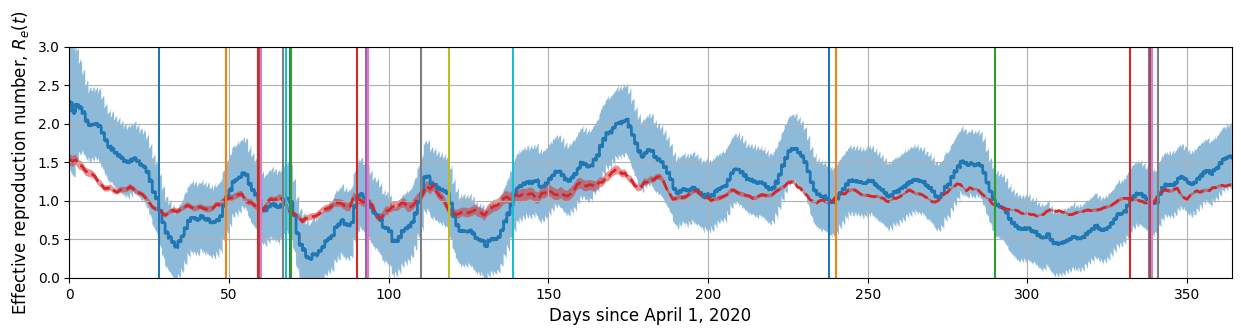

In [4]:
re_mu = np.zeros(len(x_mean[0,:]))
re_sigma = np.zeros(len(x_mean[0,:]))

for ii in range(len(x_mean[0,:])):
  Mu = [x_mean[0,ii],x_mean[3,ii]]
  Sigma = [[x_var[0,ii],x_var[3,ii]],[x_var[12,ii],x_var[15,ii]]]

  s_beta = np.random.multivariate_normal(Mu,Sigma,1000)

  re_mu[ii] = np.mean(14*s_beta[:,0]*s_beta[:,1])
  re_sigma[ii] = np.var(14*s_beta[:,0]*s_beta[:,1])

f, ax = plt.subplots(1, figsize=(15,3))
plt.plot(t,re_mu,linewidth=2,c='tab:blue')
plt.fill_between(t,re_mu+1.96*np.sqrt(re_sigma),re_mu-1.96*np.sqrt(re_sigma),facecolor='tab:blue',alpha=0.5)
# plt.fill_between(t,re_mu+1.96*np.sqrt(re_sigma),re_mu-1.96*np.sqrt(re_sigma),facecolor='tab:blue',alpha=0.5)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.plot(re_time,re_data[:,0],linewidth=2,c='tab:red',linestyle='--')
plt.fill_between(re_time,re_data[:,2],re_data[:,1],facecolor='tab:red',alpha=0.5)
for ii in range(len(re_mu)-1):
  if (re_mu[ii+1]-1)/(re_mu[ii]-1) < 0:
    plt.plot([t[ii],t[ii]],[0,3])
plt.grid(True)
plt.xlim([0,364])
plt.ylim([0,3])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Effective reproduction number, $R_e(t)$', fontsize=12)
plt.savefig('figures/m4_re.pdf')
# plt.close()